# EDA of Tavel package data
## Dataset Attributes:

### Customer details:

1. CustomerID: Unique customer ID
2. ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
3. Age: Age of customer
4. TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
5. CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
6. Occupation: Occupation of customer
7. Gender: Gender of customer
8. NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
9. PreferredPropertyStar: Preferred hotel property rating by customer
10. MaritalStatus: Marital status of customer
11. NumberOfTrips: Average number of trips in a year by customer
12. Passport: The customer has a passport or not (0: No, 1: Yes)
13. OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
14. NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
15. Designation: Designation of the customer in the current organization
16. MonthlyIncome: Gross monthly income of the customer

### Customer interaction data: 

1. PitchSatisfactionScore: Sales pitch satisfaction score
2. ProductPitched: Product pitched by the salesperson
3. NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
4. DurationOfPitch: Duration of the pitch by a salesperson to the customer

## Importing Necessary Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve
# For pandas profiling
from pandas_profiling import ProfileReport

## Load and Explore the Data

In [2]:
# C:\Users\sub13\Downloads\Dataset (1)\Dataset\data1
path = 'C:/Users/sub13/Downloads/Dataset (1)/Dataset/data1/Travel.csv'
#data = pd.read_csv(path) #load the data

In [3]:
data = pd.read_csv(path) #load the data
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
data = pd.read_csv(path) #load the data
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [5]:
df= data.copy() #making a copy to avoid changes to data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")
#checking the shape of the dataset
np.random.seed(15) 
df.sample(10) #loading random 10 rows

There are 4888 rows and 20 columns.


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4019,204019,0,60.0,Company Invited,2,9.0,Salaried,Female,3,5.0,King,3.0,Married,NaN,0,1,0,2.0,VP,37522.0
1365,201365,1,29.0,Company Invited,3,30.0,Large Business,Male,2,1.0,Basic,5.0,Single,2.0,0,3,1,1.0,Executive,16091.0
473,200473,0,49.0,Self Enquiry,1,24.0,Salaried,Male,2,4.0,King,3.0,Married,2.0,1,3,0,1.0,VP,34502.0
2554,202554,0,52.0,Company Invited,1,7.0,Small Business,Fe Male,2,5.0,Standard,5.0,Unmarried,5.0,0,2,1,1.0,Senior Manager,26162.0
1492,201492,0,34.0,Self Enquiry,1,13.0,Salaried,Fe Male,2,3.0,Standard,4.0,Unmarried,1.0,0,5,0,0.0,Senior Manager,26994.0
3809,203809,1,30.0,Company Invited,3,NaN,Large Business,Male,3,2.0,Basic,5.0,Single,3.0,0,3,1,2.0,Executive,19769.0
4385,204385,0,39.0,Self Enquiry,1,17.0,Small Business,Female,4,4.0,Deluxe,3.0,Married,5.0,0,3,0,2.0,Manager,28502.0
521,200521,0,27.0,Company Invited,3,NaN,Small Business,Female,3,2.0,Deluxe,3.0,Married,2.0,1,2,1,2.0,Manager,19647.0
4358,204358,0,49.0,Self Enquiry,3,9.0,Small Business,Female,3,4.0,Deluxe,3.0,Married,4.0,0,5,1,1.0,Manager,22729.0
475,200475,0,26.0,Self Enquiry,3,34.0,Small Business,Male,3,3.0,Deluxe,4.0,Divorced,2.0,0,3,1,0.0,Manager,21272.0


In [6]:
df.info() # looking at the structure of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [7]:
df.ProdTaken.unique()

array([1, 0], dtype=int64)

## Data Pre-Processing:


## Fixing Datatypes

In [8]:
df.drop(['CustomerID'],axis=1,inplace=True) 

In [9]:
cat_cols = ['CityTier','ProdTaken','NumberOfPersonVisiting','NumberOfChildrenVisiting','PreferredPropertyStar','Passport','PitchSatisfactionScore','OwnCar']
df[cat_cols] = df[cat_cols].astype('category')

cols = data.select_dtypes(['object']) #selecting all object datatypes and converting to category
for i in cols.columns:
    df[i] = df[i].astype('category')

df.info() #rechecking the dataset    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   category
 8   NumberOfFollowups         4843 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   category
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   catego

* The datatypes have been fixed and the memory reduced.

## Missing Value Treatment:

In [10]:
df.isna().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [11]:
missing_numerical = df.select_dtypes(include=np.number).columns.tolist()
missing_numerical.remove('Age')
missing_numerical.remove('MonthlyIncome')
missing_numerical

['DurationOfPitch', 'NumberOfFollowups', 'NumberOfTrips']

In [12]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [13]:
medianFiller = lambda x: x.fillna(x.median()) #replacing with the Median value of the attributes
df[missing_numerical] = df[missing_numerical].apply(medianFiller,axis=0)

In [14]:
#we will replace the missing values with median income w.r.t the customer's designation
df["MonthlyIncome"] = df.groupby(['Designation'])['MonthlyIncome'].transform(lambda x: x.fillna(x.median()))
df["Age"] = df.groupby(['Designation'])['Age'].transform(lambda x: x.fillna(x.median()))

In [15]:
df.tail()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


### Summary of Numerical Columns

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4888.0,37.429828,9.149822,18.0,31.0,36.0,43.00,61.0
DurationOfPitch,4888.0,15.362930,8.316166,5.0,9.0,13.0,19.00,127.0
NumberOfFollowups,4888.0,3.711129,0.998271,1.0,3.0,4.0,4.00,6.0
NumberOfTrips,4888.0,3.229746,1.822769,1.0,2.0,3.0,4.00,22.0
MonthlyIncome,4888.0,23546.843903,5266.279293,1000.0,20485.0,22413.5,25424.75,98678.0


In [17]:
cat_cols =  df.select_dtypes(['category'])
for i in cat_cols.columns:
    print(cat_cols[i].value_counts())
    print('-'*50)
    print('\n')

0    3968
1     920
Name: ProdTaken, dtype: int64
--------------------------------------------------


Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
--------------------------------------------------


1    3190
3    1500
2     198
Name: CityTier, dtype: int64
--------------------------------------------------


Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
--------------------------------------------------


Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
--------------------------------------------------


3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64
--------------------------------------------------


Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
--------------------------------------------------


3.0    

**Observations:**

* In the Gender column, we have an error value Fe Male. We will treat this as an data entry issue and replace it to Female.
* Self Inquiry is the most preffered in TypeofContact feature.
* 3.0 is the highest property rating
* And 1.0 is the highest value for the NumberOfChildrenVisiting column.
* Hence we will replace the missing values in the above columns accordingly


In [18]:
#treating missing values in categorical variables
df['TypeofContact'] = df['TypeofContact'].fillna('Self Enquiry')
df['NumberOfChildrenVisiting'] = df['NumberOfChildrenVisiting'].fillna(1.0)
df['PreferredPropertyStar'] = df['PreferredPropertyStar'].fillna(3.0)

df.Gender = df.Gender.replace('Fe Male','Female') #treating error

In [19]:
df.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

* All missing values are treated

### Summary of Categorical Variables

In [20]:
df.describe()

,Age,DurationOfPitch,NumberOfFollowups,NumberOfTrips,MonthlyIncome
count,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000
mean,37.429828,15.362930,3.711129,3.229746,23546.843903
std,9.149822,8.316166,0.998271,1.822769,5266.279293
min,18.000000,5.000000,1.000000,1.000000,1000.000000
25%,31.000000,9.000000,3.000000,2.000000,20485.000000
50%,36.000000,13.000000,4.000000,3.000000,22413.500000
75%,43.000000,19.000000,4.000000,4.000000,25424.750000
max,61.000000,127.000000,6.000000,22.000000,98678.000000


In [21]:
df.describe().T         # T for Transposed display

,count,mean,std,min,25%,50%,75%,max
Age,4888.0,37.429828,9.149822,18.0,31.0,36.0,43.00,61.0
DurationOfPitch,4888.0,15.362930,8.316166,5.0,9.0,13.0,19.00,127.0
NumberOfFollowups,4888.0,3.711129,0.998271,1.0,3.0,4.0,4.00,6.0
NumberOfTrips,4888.0,3.229746,1.822769,1.0,2.0,3.0,4.00,22.0
MonthlyIncome,4888.0,23546.843903,5266.279293,1000.0,20485.0,22413.5,25424.75,98678.0


In [22]:
df.describe(include="category").T
# Duration of pitch meaning time taken for presenting business ideas to another party

,count,unique,top,freq
ProdTaken,4888,2,0,3968
TypeofContact,4888,2,Self Enquiry,3469
CityTier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
Gender,4888,2,Male,2916
NumberOfPersonVisiting,4888,5,3,2402
ProductPitched,4888,5,Basic,1842
PreferredPropertyStar,4888.0,3.0,3.0,3019.0
MaritalStatus,4888,4,Married,2340
Passport,4888,2,0,3466


**Observations:**
* Self Inquiry is the most preffered Type of Contact
* ProdTaken : There is heavy imbalance in this column where atleast 80% customers did not purchase any product
* CityTier : Most customers are from Tier 1
* Occupation : Most customers earn a salary
* Gender : Male customers are slightly higher than Female Customers
* NoOfPersonsVisting: Most customers plan to take atleast 3 additional persons with them in the trip
* ProductPitched : Basic is the popular product
* MaritalStatus : Most customers are married
* Passport : Most customers dont have a passport
* PitchSatisfactionScore : Most customers have rated 3.0 
* OwnCar: Most customers own a car
* NumberofChildrenVisting : Most customers plan to take atleast 1 child under five with them for the trip.
* Designation : Most customers belong to Executive designation

## Exploratory Data Analysis:

### Univariate Analysis - Numerical Columns:

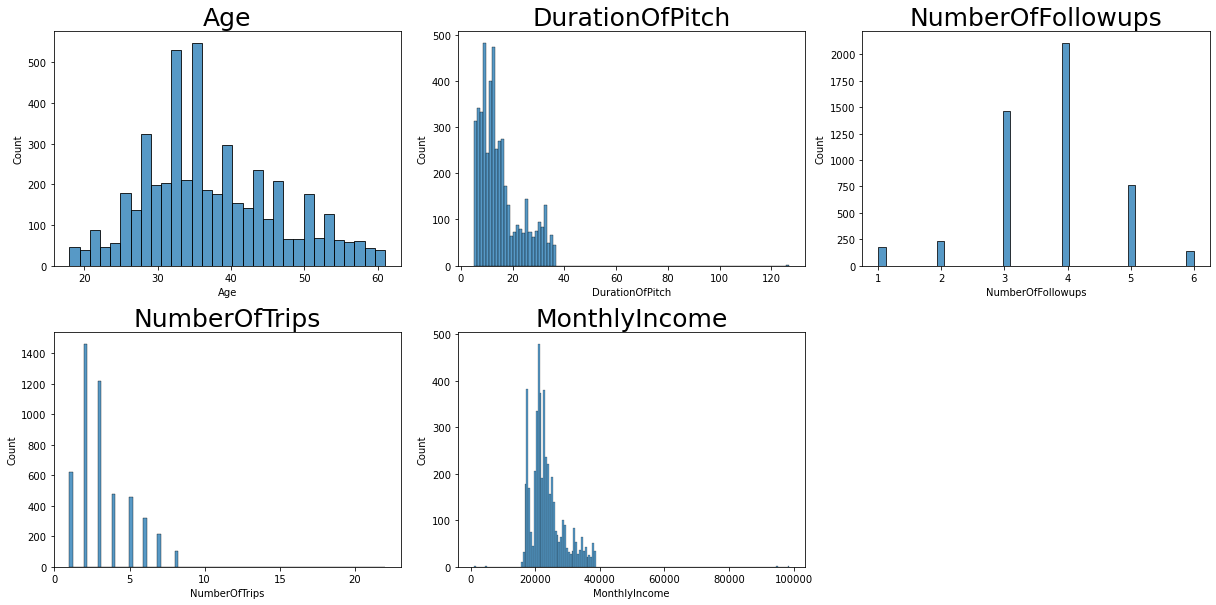

In [23]:
#Performing Univariate Analysis to study the central tendency and dispersion
#Plotting histogram to study distribution
Uni_num = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17,75))
for i in range(len(Uni_num)):     #creating a loop that will show the plots for the columns in one plot
    plt.subplot(18,3,i+1)
    sns.histplot(df[Uni_num[i]],kde=False)
    plt.tight_layout()
    plt.title(Uni_num[i],fontsize=25)

plt.show()

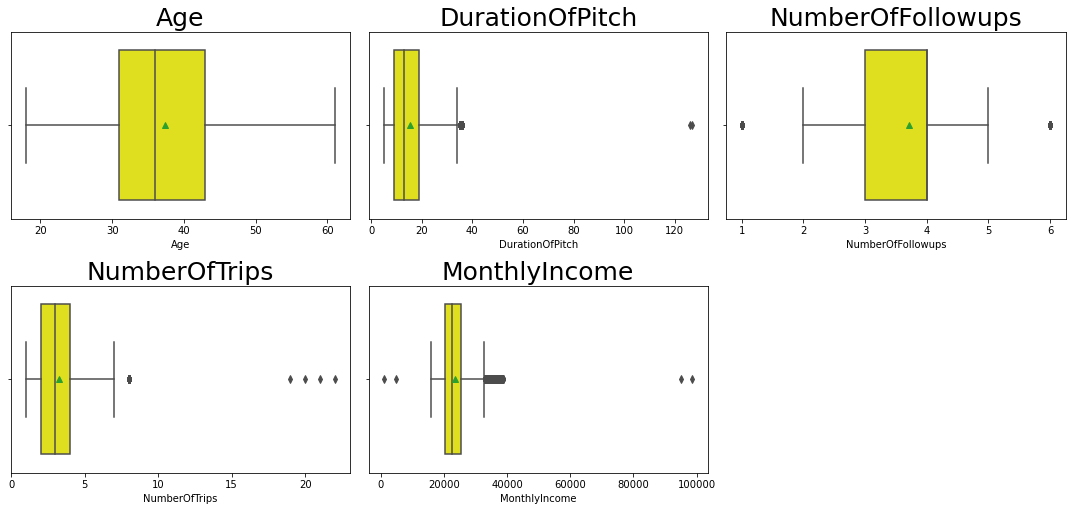

In [24]:
plt.figure(figsize=(15,35))
for i in range(len(Uni_num)):
    plt.subplot(10,3,i+1)
    sns.boxplot(df[Uni_num[i]],showmeans=True, color='yellow')
    plt.tight_layout()
    plt.title(Uni_num[i],fontsize=25)

plt.show()

**Observations:**

* Age variable is almost normally distributed with no outliers. we see that most customers are in the age brackets 30- 45 yrs.
* DurationofPitch is slightly right-skewed. We see that most customer's pitch duration was under 20 mins. We also see few outliers at 40 mins and at 120+ mins. 
* The highest number of followups is 4.0 followed by 3.0. 
* NumberofTrips is right-skwed a little and majority of the customers seem to take atleast 3 trips per year. We also see very few outliers in the higher end
* MonthlyIncome is also right-skewd. However, we see that the majority of customers are between income bracket 20K dollars and 30K dollars. We also see two outliers in the low end and on the highest end. There are several outliers after the approx 35K dollars income level.


### Univariate Analysis - Categorical Columns:

In [25]:
categorical_val = df.select_dtypes(exclude=np.number).columns.tolist()

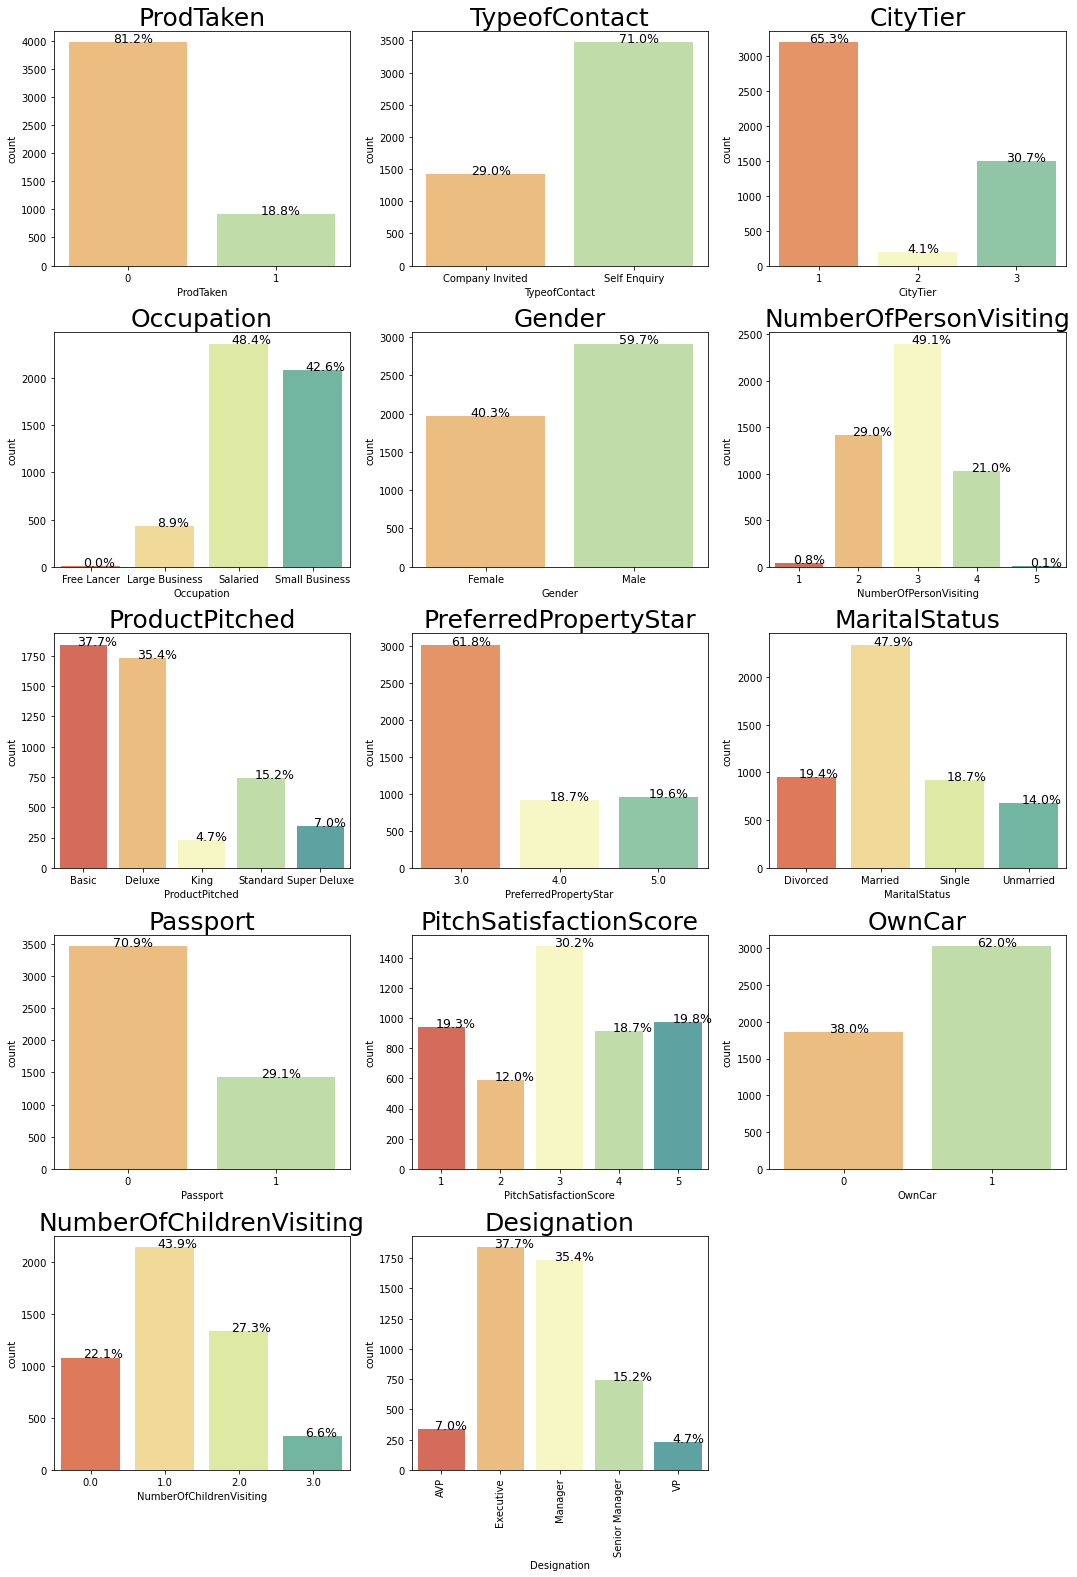

In [26]:
plt.figure(figsize=(15,75))
for i in range(len(categorical_val)):     #creating a loop that will show the plots for the columns in one plot
    plt.subplot(18,3,i+1)
    ax=sns.countplot(df[categorical_val[i]],palette='Spectral')
    plt.tight_layout()
    plt.title(categorical_val[i],fontsize=25)
    total = len (df[categorical_val[i]])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + (p.get_width() / 2)-0.1  # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12.5,color='black') # To annonate
plt.xticks(rotation=90)
plt.show()

**Observations:**
* ProdTaken is the dependent variable. We that only 18.8% of the total customers purchased any of the travel package.The plot shows heavy imbalance in the dataset

* Self-Enquiry is the most preffered contact method by the customers at 71%

* 65.3% of customers are from Tier 1 cities and Tier3 cities comes second at 30.7%. 

* 48.4% of customers are Salaried, i.e work for an organization and customers with Small Business are the next highest in Occupation at 42.6%. 

* Male customers(59.7%) are higher than Female customers (40.3%)

* 49.1% of customers plan to take atleast 3 persons with them during trip. Around 29% customers want to take 2 people and 21% customers want to take 4 additional persons with them during their travel

* Basic(37.7%) and Deluxe(35.4%) are the most popular travel packages. The next slightly popular one is the Standard Travel package at 15.2%

* 61.8% customers prefer a three star hotel rating compared to four (18.7%) and five (19.6%) star rating hotels

* Married customers form the bulk of the data at 47.9% with Divorced (19.4%) and Single (18.7%) coming in close second and Unmarried(with partners) customers form 14% of the data

* Only 29.1% of customers have a passport and almost 62% of customers own a car

* Only 30.2% of customers rated the Sales Pitch with a score of 3. Even though 18.7% customers rated at 4 and 19.8% rated a pitch score of 5, we also see that 19.3% rated the Sales pitch score at 1. This shows a need for improvement in this area

* Around 43.9% of customers have atleast one child under age Five, planning to accompany them in the travels

* Executive (37.7%) and Manager(35.4%) are the highest Designations of the customers in the dataset

## Correlation Matrix

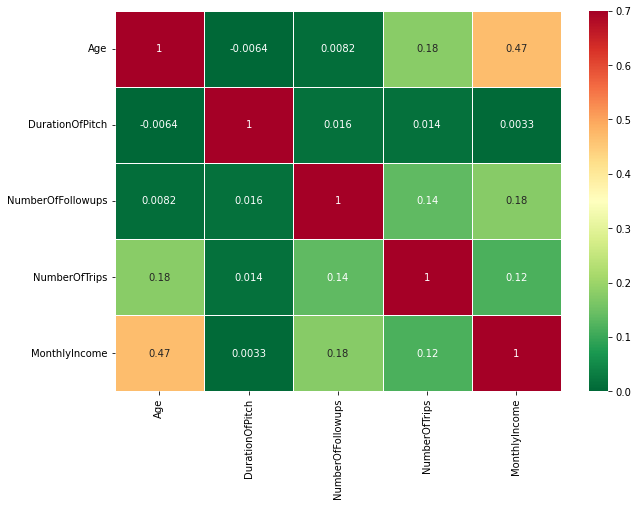

In [27]:
corr= df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot= True,vmin=0,vmax=0.7, cmap='RdYlGn_r',linewidths=0.75)
plt.show()

**Observations:**
* The correlation values are quite low between all the variables.
* Only Age and DurationofPitch have a very low negative correlation.
* MonthlyIncome and Age have the highest positive correlation at 0.47; i.e as Age increases, so does MontlyIncome
* NumberofFollowups and NumberofTrips have a  moderate positive correlation between them and also individually with Monthly Income.

## Bivariate Analysis:
* Let's analyse the dependent variable with all the numerical and categorical features and investigate possible relationships

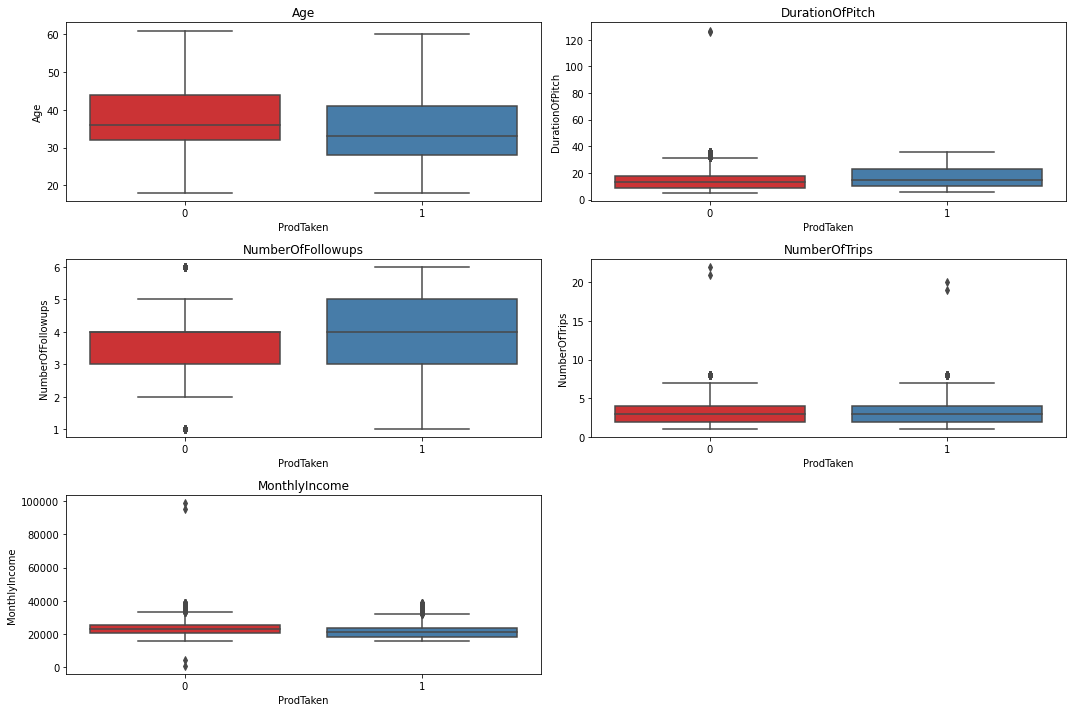

In [28]:
# For all numerical variables with Personal_Loan
plt.figure(figsize=(15,10))
for i, variable in enumerate(Uni_num):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(df['ProdTaken'],df[variable],palette="Set1")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

**Observations:**
* The mean Age for customers who purchased any Product is slightly less than those who didnt. We also see that Age variable doesnt have any outliers. 
* The mean DurationofPitch for both classed of ProdTaken is almost equal. We see there are many outliers in Class '0' of ProdTaken, suggesting that longer pitch durations doesnt lead to product purchase.
* Interestingly, Customers who purchased the packages had an average of atleast four followups, compared to customers who didnt.
* The Averages for  NumberofTrips and MonthlyIncome;for both Classes of ProdTaken is almost equal. MonthlyIncome variable has several outliers in the higher end for both ProdTaken classes and very few in low end of Class '0'.


In [29]:
#Stacked plot of categorical variables with Personal Loans
def stacked_plot(x):
    sns.set(palette='Dark2')
    tab1 = pd.crosstab(x,df['ProdTaken'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['ProdTaken'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=True)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.ylabel('Percentage')
    plt.show()

ProdTaken           0    1   All
TypeofContact                   
Company Invited  1109  310  1419
Self Enquiry     2859  610  3469
All              3968  920  4888
------------------------------------------------------------------------------------------------------------------------


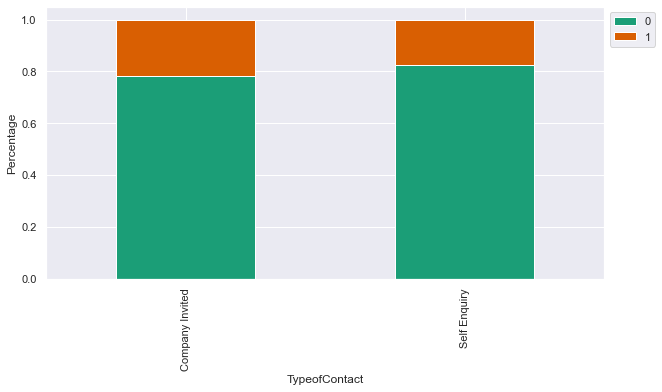

In [30]:
stacked_plot(df.TypeofContact)

* More Customers with CompanyInvited contact have bought Travel Packages

ProdTaken     0    1   All
CityTier                  
1          2670  520  3190
2           152   46   198
3          1146  354  1500
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


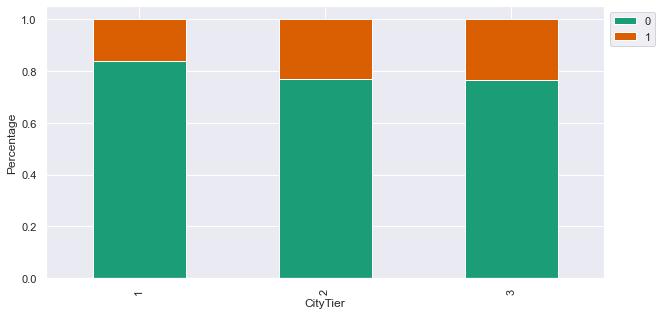

In [31]:
stacked_plot(df.CityTier)

* More Customers from Tier2 and Tier3 cities have purchased Travel Packages

ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   314  120   434
Salaried        1954  414  2368
Small Business  1700  384  2084
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


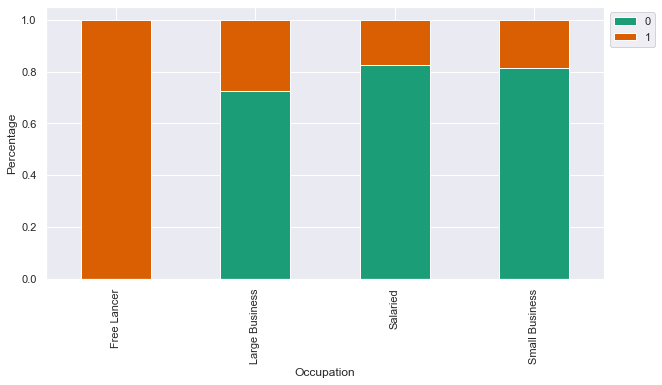

In [32]:
stacked_plot(df.Occupation)

* Though customers who are  Freelancers by Occupation have bought travel packages, the sample size is only two. 
* Of the 434 Large Business owning customers, almost 30% bought travel packages. 
* Among Salaried and Small Business owning customers,close to 20% have bought travel packages

ProdTaken     0    1   All
Gender                    
Female     1630  342  1972
Male       2338  578  2916
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


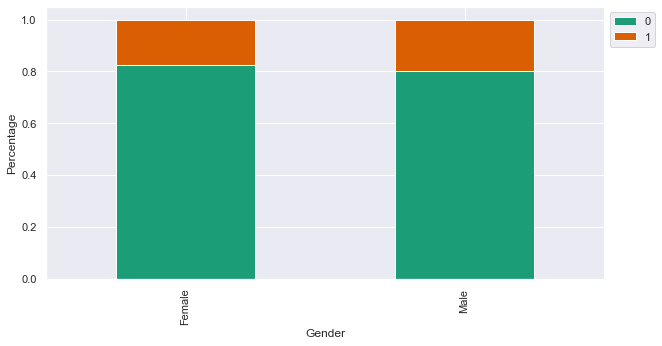

In [33]:
stacked_plot(df.Gender)

* Despite Male customers being significantly higher than Female customer, the percentage of those who bought travel packages is almost the same(or with minimum difference).  

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
1                         39    0    39
2                       1151  267  1418
3                       1942  460  2402
4                        833  193  1026
5                          3    0     3
All                     3968  920  4888
------------------------------------------------------------------------------------------------------------------------


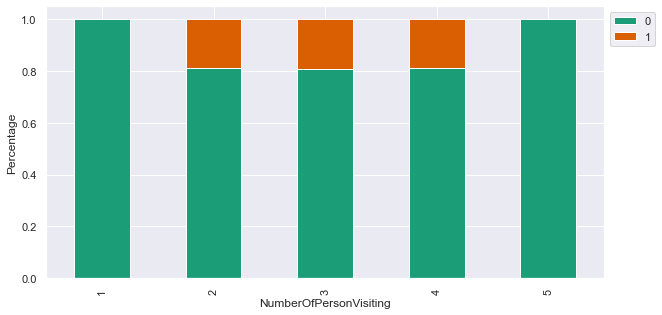

In [34]:
stacked_plot(df.NumberOfPersonVisiting)

* Among Customers who plan to take between 2-4 persons with them during travel, close to 20%  have bought a travel package product.
* Interestingly, we see that all Customers with one companion and five comapanions, did not purchase any product. 
* This suugests that the products dont seem either appealing or beneficial to the customers of the above two categories. This area needs further investigation

ProdTaken          0    1   All
ProductPitched                 
Basic           1290  552  1842
Deluxe          1528  204  1732
King             210   20   230
Standard         618  124   742
Super Deluxe     322   20   342
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


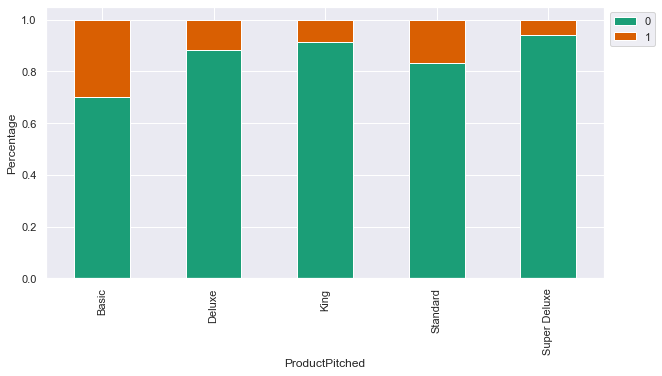

In [35]:
stacked_plot(df.ProductPitched)

* The Basic Package is the most preffered, with Standard and Deluxe following up.
* Comparitively very few customers purchased Super Deluxe products

ProdTaken                 0    1   All
PreferredPropertyStar                 
3.0                    2531  488  3019
4.0                     731  182   913
5.0                     706  250   956
All                    3968  920  4888
------------------------------------------------------------------------------------------------------------------------


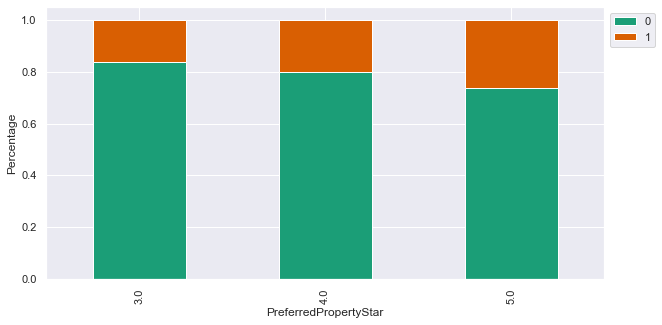

In [36]:
stacked_plot(df.PreferredPropertyStar)

* Though majority of customers prefer a 3.0 star rated Property, the percentage of customers purchasing the products is comparitively less than customers who prefer a 4.0 and 5.0 star rated property. 
* The higher the proprety star rating, higher the number of customers who purchased a product

ProdTaken         0    1   All
MaritalStatus                 
Divorced        826  124   950
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
All            3968  920  4888
------------------------------------------------------------------------------------------------------------------------


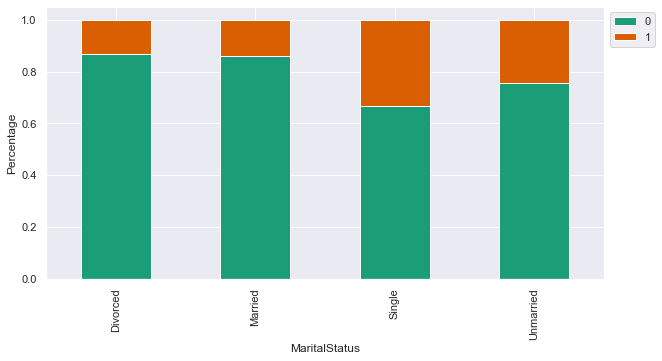

In [37]:
stacked_plot(df.MaritalStatus)

* Around 30% of all Single customers have bought a product and about 25% of Unmarried customers have also purchased a product
* Almost 50% of the total customers belong to the married category, but we see that only approx 15% of them have actually purchased any product. 

ProdTaken     0    1   All
Passport                  
0          3040  426  3466
1           928  494  1422
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


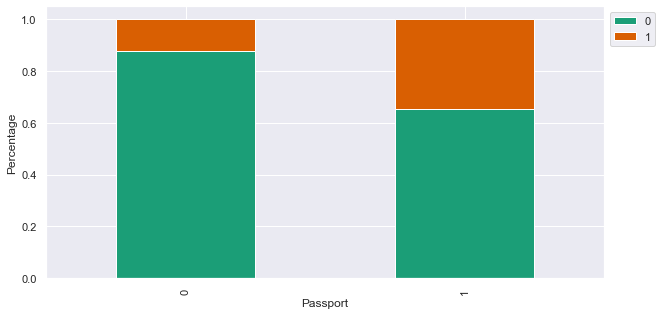

In [38]:
stacked_plot(df.Passport)

* More customers with passport tend to purchase products than those who dont.

ProdTaken                  0    1   All
PitchSatisfactionScore                 
1                        798  144   942
2                        498   88   586
3                       1162  316  1478
4                        750  162   912
5                        760  210   970
All                     3968  920  4888
------------------------------------------------------------------------------------------------------------------------


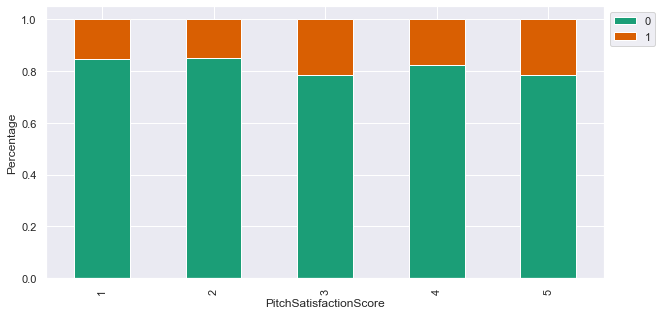

In [39]:
stacked_plot(df.PitchSatisfactionScore)

* Majority of customers have given a score of 3.0 to the Sale pitch for the products.
* But we observe that the number of customers who purchased any product is almost equal across all pitch scores. 
* This suggests that a high product pitch score doesnt guarantee purchase 

ProdTaken     0    1   All
OwnCar                    
0          1496  360  1856
1          2472  560  3032
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


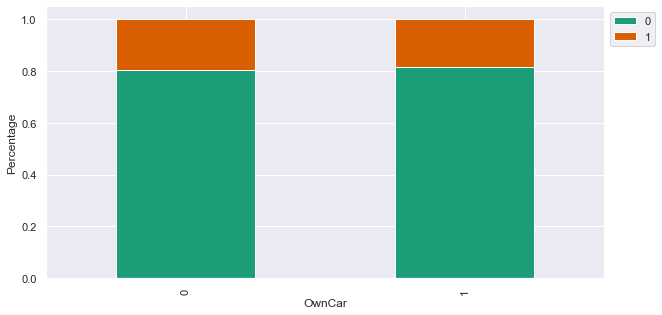

In [40]:
stacked_plot(df.OwnCar)

* The number of customers who bought a product is fairly equal across both classes of OwnCar

ProdTaken                    0    1   All
NumberOfChildrenVisiting                 
0.0                        880  202  1082
1.0                       1747  399  2146
2.0                       1082  253  1335
3.0                        259   66   325
All                       3968  920  4888
------------------------------------------------------------------------------------------------------------------------


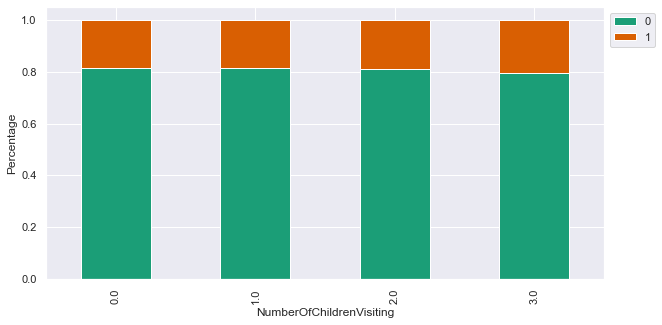

In [41]:
stacked_plot(df.NumberOfChildrenVisiting)

* We see that the percentage of customes who purchased a product is fairly same across all categories of variable NumberOfChildrenVisiting.

ProdTaken          0    1   All
Designation                    
AVP              322   20   342
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
VP               210   20   230
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


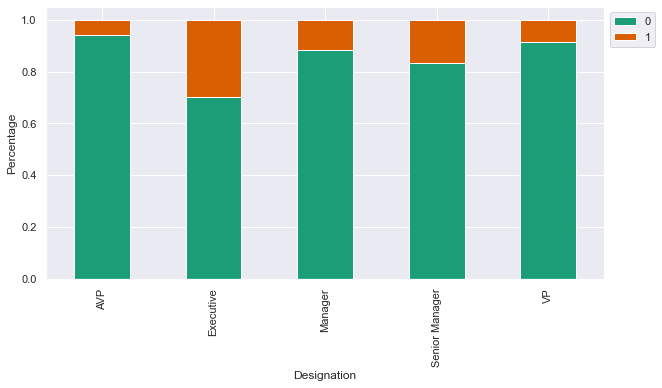

In [42]:
stacked_plot(df.Designation)

* Around  30% Customers with Executive Designation have purchased a product 
* Sr. Manager(16%) and Manager(~11%) Designation customers have purchased a product. 
* Very few customers of VP and AVP Designation have purchased a product. 

## Outliers Detection and Treatment : 

In [43]:
#Let's find the percentage of outliers using IQR

In [44]:
Q1 = data.quantile(0.25)             #To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1                           #Inter Quantile Range (75th perentile - 25th percentile)

lower=Q1-1.5*IQR                        #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper=Q3+1.5*IQR

In [45]:
outlier_num = df.select_dtypes(include=np.number)

In [46]:
outlier_num

,Age,DurationOfPitch,NumberOfFollowups,NumberOfTrips,MonthlyIncome
0,41.0,6.0,3.0,1.0,20993.0
1,49.0,14.0,4.0,2.0,20130.0
2,37.0,8.0,4.0,7.0,17090.0
3,33.0,9.0,3.0,2.0,17909.0
4,32.0,8.0,3.0,1.0,18468.0
...,...,...,...,...,...
4883,49.0,9.0,5.0,2.0,26576.0
4884,28.0,31.0,5.0,3.0,21212.0
4885,52.0,17.0,4.0,7.0,31820.0
4886,19.0,16.0,4.0,3.0,20289.0


In [47]:
((outlier_num<lower)|(outlier_num>upper)).sum()/len(df)*100

Age                         0.000000
CityTier                    0.000000
CustomerID                  0.000000
DurationOfPitch             0.040917
MonthlyIncome               7.058101
NumberOfChildrenVisiting    0.000000
NumberOfFollowups           6.382979
NumberOfPersonVisiting      0.000000
NumberOfTrips               2.229951
OwnCar                      0.000000
Passport                    0.000000
PitchSatisfactionScore      0.000000
PreferredPropertyStar       0.000000
ProdTaken                   0.000000
dtype: float64


* MonthlyIncome and NumberofFollowups have high outliers compared to the other features.
* However, we will not be treating outliers, as we will be building Decision Tree based models and Decision Tree models are not influenced by Outliers.
* Furthermore, in real case scenario, we will encounter similar outliers and that would require the model to investigate if there is any pattern among the customers